In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Violin graph

Empty DataFrame
Columns: [cpu_tier, cpu_cores, cpu_threads, cpu_base_ghz, cpu_boost_ghz, gpu_tier, vram_gb, ram_gb, storage_gb, display_size_in, weight_kg, price]
Index: []


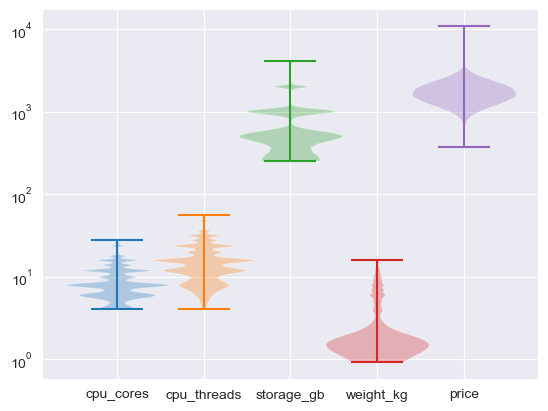

In [3]:
pcs = pd.read_csv('./computer_prices_all.csv').drop(columns=['model', 'warranty_months', 'bluetooth', 'wifi','resolution']).drop(columns=['psu_watts', 'charger_watts', 'battery_wh', 'refresh_hz'])
pcs = pcs.drop(columns=['gpu_model','release_year','storage_drive_count'])
nnomPcs = pcs.drop(columns=["device_type","brand","os","form_factor","cpu_brand","cpu_model","gpu_brand","storage_type","display_type"])
print(nnomPcs.head(n = 0))
h = nnomPcs.values.transpose()
r = range(0,5)
ind = [1,2,8,10,11]

for i in r:
    plt.violinplot(h[ind[i]], [i], widths=1.2)
    #plt.scatter(np.full((1,h[i].size), i), h[i])
plt.xticks(r, nnomPcs.columns[ind])
plt.yscale('log')
plt.show()

## Timo

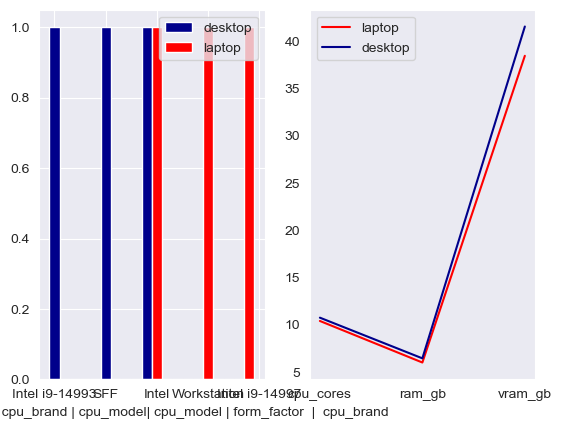

In [4]:
df = pd.read_csv('./computer_prices_all.csv',sep=',')
df = df.drop(columns=['brand', 'model', 'release_year', 'os', 'cpu_tier', 'cpu_threads', 'cpu_base_ghz', 'cpu_boost_ghz', 'gpu_tier', 'gpu_brand', 'gpu_model', 'storage_type', 'storage_gb', 'storage_drive_count', 'display_type', 'display_size_in', 'resolution', 'refresh_hz', 'battery_wh', 'charger_watts', 'psu_watts', 'wifi', 'bluetooth', 'weight_kg', 'warranty_months', 'price'])
laptops = df[df['device_type']=='Laptop']
lap1=[laptops['cpu_cores'].mean(), laptops['vram_gb'].mean(), laptops['ram_gb'].mean()]
lap2 = [laptops['form_factor'].max(), laptops['cpu_brand'].max(), laptops['cpu_model'].max()]
desktops = df[df['device_type']=='Desktop']
desk1=[desktops['cpu_cores'].mean(), desktops['vram_gb'].mean(), desktops['ram_gb'].mean()]
desk2 = (desktops['cpu_model'].max(), desktops['form_factor'].max(), desktops['cpu_brand'].max())
vals = ['cpu_cores', 'ram_gb', 'vram_gb']
lap = pd.Series(lap1, index=vals)
desk = pd.Series(desk1, index=vals)
fig, (ax0,ax1) = plt.subplots(1, 2)
ax0.hist(desk2, color='darkblue', align='left', label='desktop')
ax0.hist(lap2, color='red', align='left', label='laptop')
ax0.legend()
ax0.set_xlabel ('form_factor  | cpu_brand | cpu_model| cpu_model | form_factor  |  cpu_brand')
ax1.plot(lap, color='red', label='laptop')
ax1.plot(desk, color='darkblue', label='desktop')
ax1.legend()
ax1.grid()
plt.show()

## Alex

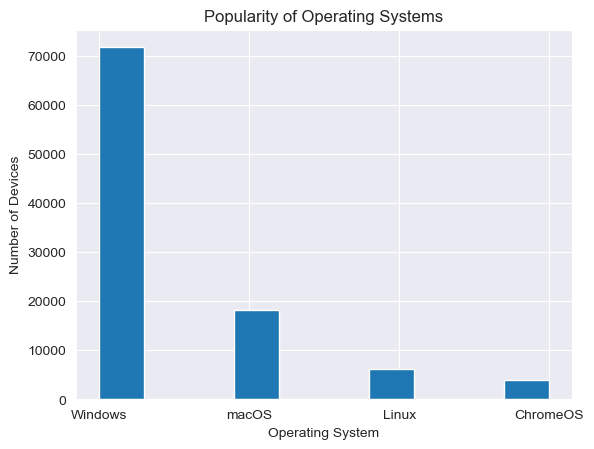

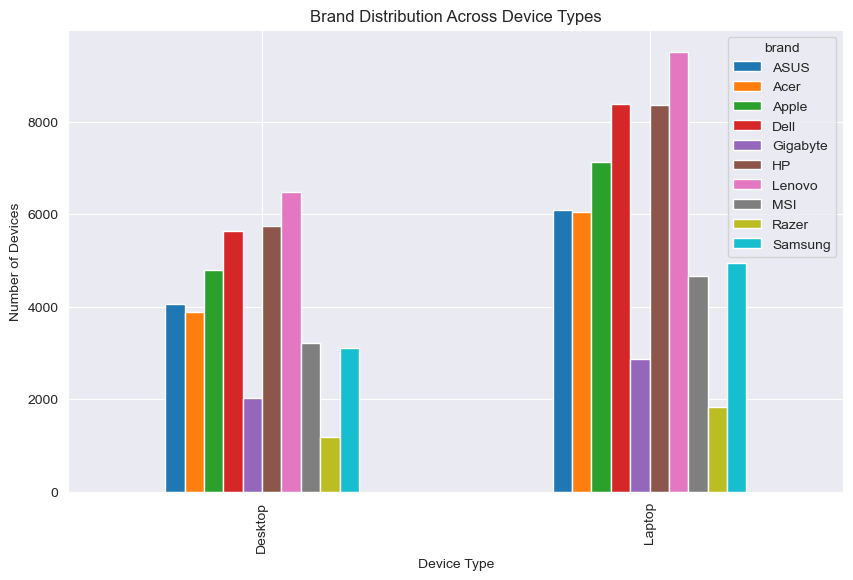

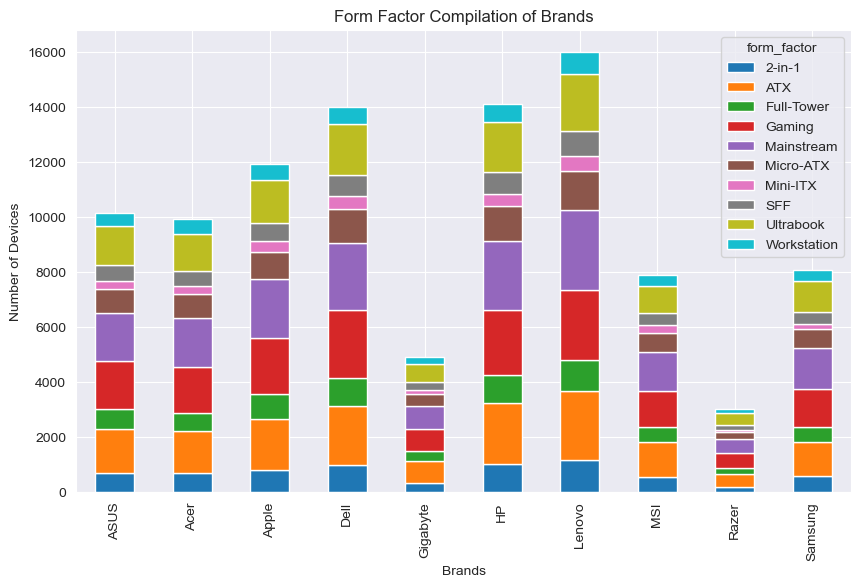

In [5]:
df = pd.read_csv("./computer_prices_all.csv")

#dev = df["device_type"].to_numpy()
os = df["os"].to_numpy()
#brands = df["brand"].to_numpy()
#form_factor = df["form_factor"].to_numpy()

y = "Number of Devices"

#bins = ["Windows", "macOS", "Linux", "ChromeOS"]
# Operating Systems - Popularity
plt.hist(os)
plt.title("Popularity of Operating Systems")
plt.xlabel("Operating System")
plt.ylabel(y)
plt.show()
#plt.savefig("os_pop.jpg")

# Brands on Desktop / Laptop
#df.groupby(["device_type", "brand"]).size().unstack().plot(kind="bar", stacked=True, figsize=(10,6))
df.groupby(["device_type", "brand"]).size().unstack().plot(kind="bar", stacked=False, figsize=(10,6))
plt.title("Brand Distribution Across Device Types")
plt.xlabel("Device Type")
plt.ylabel(y)
plt.show()
#plt.savefig("brands_dev_stacked.jpg")
#plt.savefig("brands_dev_non_stacked.jpg")


df.groupby(["brand", "form_factor"]).size().unstack().plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Form Factor Compilation of Brands")
plt.xlabel("Brands")
plt.ylabel(y)
plt.show()



## Herbert

In [ ]:
prices = pd.read_csv('./computer_prices_all.csv')
# print(prices)
#
# prices_stats = prices.describe(include='all')
# print(prices_stats)
#
# prices.sort_values('Laptop')
#
# prices.sort_values('brand')
#
# for column in prices.columns:
#     print(f"\n{column}:")
#     print(prices[column].value_counts())
#
#
# print(prices.iloc[:, 0].values)

stetig_liste = ["cpu_base_ghz","cpu_boost_ghz","display_size_in","bluetooth","weight_kg","price"]
nominal_liste = ["device_type","brand","model","os","form_factor","cpu_brand","cpu_model","gpu_brand","gpu_model","storage_type","display_type","resolution","wifi"]
diskret_liste = ["release_year","cpu_tier","cpu_cores","cpu_threads","gpu_tier","vram_gb","ram_gb","storage_gb","storage_drive_count","refresh_hz","battery_wh","charger_watts","psu_watts","warranty_months"]

prices_nom = prices.drop(columns=stetig_liste)
prices_stet = prices.drop(columns=nominal_liste)

sns.pairplot(prices_nom)
np.corrcoef(prices_nom.values, rowvar=False)